# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Dataset

In [2]:
df_places = pd.read_csv('./places_reims.csv')
df_places.head()

,id,nom,nbAvis,latitude,longitude,shape_gid,gtrip
0,243540,Palais du Tau,429,49.253190,4.032900,71233,187137
1,230789,Basilique Saint-Rémy,604,49.243763,4.039834,71233,187137
2,7340686,Il Mercato,88,49.260050,4.032670,71233,187137
3,230794,Musée des Beaux-arts de Reims,98,49.253185,4.030351,71233,187137
4,2359348,Porte Mars,165,49.261100,4.029468,71233,187137


C:\Users\yh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


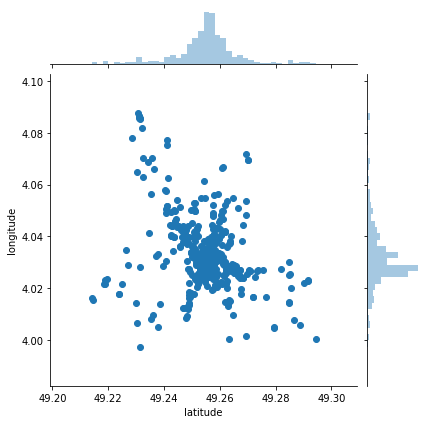

In [3]:
sns.jointplot(x=df_places['latitude'], y=df_places['longitude'], kind='scatter')

# Analysis 

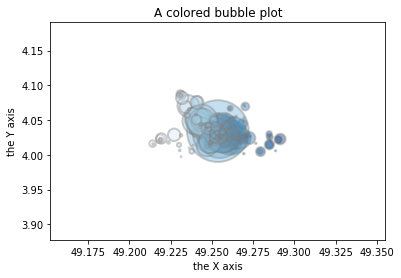

In [4]:
# create data
x = df_places['latitude']
y = df_places['longitude']
z = df_places['nbAvis']

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()

In [5]:
import folium

print(folium.__version__)

0.7.0


In [6]:
from folium.plugins import HeatMap

m = folium.Map([49.25,4.0333], zoom_start=13)

HeatMap(df_places[['latitude', 'longitude', 'nbAvis']].values.tolist()).add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [7]:
df_reviews = pd.read_csv('./reviews_reims.csv')
df_reviews.head()

,id,idplace,idauteur,note,date_review,date_visit,langue
0,363339309,243540,292A9D424A0693C89A2273279F2B4A67,5,2016-04-11,2016-04-01,fra
1,359413567,243540,D19A777697BAC3FCF25F0847A135D4B7,5,2016-03-28,2016-03-01,fra
2,359095911,243540,3500BDFA4C2DB18CD9BF03CD10266F50,5,2016-03-27,2016-03-01,fra
3,356697642,243540,D77528E4C361D71885A9E5F898765155,3,2016-03-19,2016-03-01,fra
4,355217446,243540,D78C89EA996BD70ED0BA53FCF47E4919,4,2016-03-14,2016-03-01,fra


# Volume per place using reviews

In [8]:
nb_places = len(df_places)
nb_places

573

In [9]:
df_tmp_places = df_places[["id", "latitude", "longitude"]]
df_tmp_places.head()

,id,latitude,longitude
0,243540,49.253190,4.032900
1,230789,49.243763,4.039834
2,7340686,49.260050,4.032670
3,230794,49.253185,4.030351
4,2359348,49.261100,4.029468


In [10]:
tmp_volume = pd.DataFrame(index=df_tmp_places.index, columns=["volume"])

for i in range(nb_places):
    tmp_volume["volume"][i] = len(df_reviews[df_reviews["idplace"] == df_tmp_places["id"][i] ])

In [11]:
tmp_volume

,volume
0,437
1,612
2,91
3,98
4,166
5,59
6,12
7,593
8,416
9,631


# Using reviews in time

In [12]:
from datetime import datetime

In [13]:
def add_one_month(date):
    if date.month < 12 : 
        return date.replace(month=date.month+1)
    else :
        return date.replace(month=1, year=date.year+1)

In [14]:
df_tmp_places = df_places[["id", "latitude", "longitude"]]
df_tmp_places.reset_index(inplace=True,drop=True)
nb_places = len(df_tmp_places)
df_tmp_places.head()

,id,latitude,longitude
0,243540,49.253190,4.032900
1,230789,49.243763,4.039834
2,7340686,49.260050,4.032670
3,230794,49.253185,4.030351
4,2359348,49.261100,4.029468


In [15]:
# BEGINNING DATE : 2002-11-14 - ENDING DATE : 2016-12-07
date_from = datetime.strptime('2002-11-01', '%Y-%m-%d')
date_to = add_one_month(date_from)

# periodic_volumes is an array containing all volumes for each place, each month
# periodic_volumes is an array of arrays : [ [[latitude, longitude, volume],... ], ... ]
periodic_volumes =[] 

# Loop for the right number of month between the beginning date and the ending date :
number_of_month = 169

for j in range(number_of_month) :
    
    # creating df volume
    tmp_volume = pd.DataFrame(index=df_tmp_places.index, columns=["volume"])
    for i in range(nb_places):
        print("j : "+str(j))
        
        tmp_selected_reviews = df_reviews[(df_reviews["idplace"] == df_tmp_places["id"][i]) 
                                         & (df_reviews["date_review"] != "0000-00-00")]
        
        # Reinitializing index of dataframe :
        tmp_selected_reviews.reset_index(inplace=True,drop=True)
        
        bool_period = pd.DataFrame(index=range(len(tmp_selected_reviews)), columns=["after", "before"])

        for k in range(len(tmp_selected_reviews)): 
            bool_period["after"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') >= date_from
            bool_period["before"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') < date_to

        tmp_volume["volume"][i] = len(tmp_selected_reviews[bool_period["after"] & bool_period["before"]])
        

    
    # fusion avec df places
    df_result = pd.concat([df_tmp_places[["latitude","longitude"]], tmp_volume],axis=1) 
    
    # conversion en array
    tmp_array = df_result[df_result['volume'] != 0].values.tolist()
    
    # ajout à l'array globale
    periodic_volumes.append(tmp_array)
    
    # incrementation du temps
    date_from = add_one_month(date_from)
    date_to = add_one_month(date_from)

    
# calculer les volume sur un mois, ranger ca dans une array, faire pareil pour les mois suivants


j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 0
j : 

j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 2
j : 

j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 4
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 5
j : 

j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 7
j : 

j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 9
j : 

j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11
j : 11

j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13
j : 13

j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 15
j : 16

j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 17
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18
j : 18

j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 19
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20
j : 20

j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 21
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22
j : 22

j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 23
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24
j : 24

j : 25
j : 25
j : 25
j : 25
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26
j : 26

j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28
j : 28

j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30
j : 30

j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32
j : 32

j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34
j : 34

j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36
j : 36

j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38
j : 38

j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40
j : 40

j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42
j : 42

j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44
j : 44

j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46
j : 46

j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48
j : 48

j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50
j : 50

j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52
j : 52

j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54
j : 54

j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56
j : 56

j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 58
j : 59
j : 59
j : 59

j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 60
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61
j : 61

j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 62
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63
j : 63

j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 64
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65
j : 65

j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 66
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67
j : 67

j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69
j : 69

j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71
j : 71

j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73
j : 73

j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75
j : 75

j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77
j : 77

j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79
j : 79

j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81
j : 81

j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83
j : 83

j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85
j : 85

j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87
j : 87

j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89
j : 89

j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91
j : 91

j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93
j : 93

j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95
j : 95

j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97
j : 97

j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 99
j : 100
j : 100
j : 100
j :

j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101
j : 101


j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103
j : 103


j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105
j : 105


j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 106
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107
j : 107


j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108
j : 108


j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110
j : 110


j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112
j : 112


j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114
j : 114


j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 115
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116
j : 116


j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117
j : 117


j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119
j : 119


j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121
j : 121


j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123
j : 123


j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 124
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125
j : 125


j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126
j : 126


j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128
j : 128


j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130
j : 130


j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132
j : 132


j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 133
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134
j : 134


j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135
j : 135


j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137
j : 137


j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139
j : 139


j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141
j : 141


j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 142
j : 143
j : 143
j : 143
j : 143
j : 143


j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144
j : 144


j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146
j : 146


j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148
j : 148


j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 149
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150
j : 150


j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151
j : 151


j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153
j : 153


j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155
j : 155


j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157
j : 157


j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 158
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159
j : 159


j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160
j : 160


j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162
j : 162


j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164
j : 164


j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166
j : 166


j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 167
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168
j : 168


In [16]:
#import folium
import folium.plugins as plugins

m = folium.Map([49.25,4.0333], zoom_start=13)

hm = plugins.HeatMapWithTime(periodic_volumes)

hm.add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [17]:
#m.save(os.path.join('results', 'Heatmap_Reims.html'))

# Calculating the intensity indicator

In [18]:
%run growth_value.ipynb

Function get_growth(date) is now available.


In [19]:
# BEGINNING DATE : 2002-11-14 - ENDING DATE : 2016-12-07
date_from = datetime.strptime('2002-11-01', '%Y-%m-%d')
date_to = add_one_month(date_from)

area = 46.9 #km²
density = nb_places / area

# Loop for the right number of month between the beginning date and the ending date :
number_of_month = 169

df_intensity = pd.DataFrame(index=range(number_of_month), columns=["date","volume","intensity"])


for j in range(number_of_month) :
    print(j)
    
    # pour chaque mois 
    # on compte le nombre de reviews 
    # Selecting reviews with a valid date : 
    tmp_selected_reviews = df_reviews[(df_reviews["date_review"] != "0000-00-00")]


    # Reinitializing index of dataframe :
    tmp_selected_reviews.reset_index(inplace=True,drop=True)

    bool_period = pd.DataFrame(index=range(len(tmp_selected_reviews)), columns=["after", "before"])

    for k in range(len(tmp_selected_reviews)): 
        bool_period["after"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') >= date_from
        bool_period["before"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') < date_to

    volume = len(tmp_selected_reviews[bool_period["after"] & bool_period["before"]])
    
    df_intensity["date"][j] = date_from
    df_intensity["volume"][j] = volume
    df_intensity["intensity"][j] = ( volume / get_growth(date_from) ) * density

    
    # incrementation du temps
    date_from = add_one_month(date_from)
    date_to = add_one_month(date_from)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168


In [20]:
df_intensity.head()

,date,volume,intensity
0,2002-11-01 00:00:00,2,0.00492883
1,2002-12-01 00:00:00,1,0.00215965
2,2003-01-01 00:00:00,1,0.00191393
3,2003-02-01 00:00:00,0,0
4,2003-03-01 00:00:00,1,0.00157135


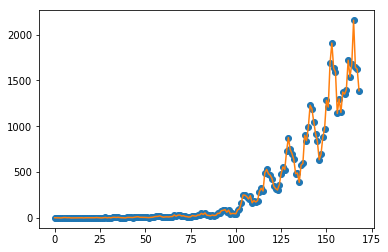

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import statsmodels.api as sm

# introduce some floats in our x-values
x = list(range(number_of_month))
y = list(df_intensity['volume'])


plt.plot(x, y, 'o')
#plt.plot(lowess_x, lowess_y, '*')
plt.plot(x, y, '-')
plt.show()

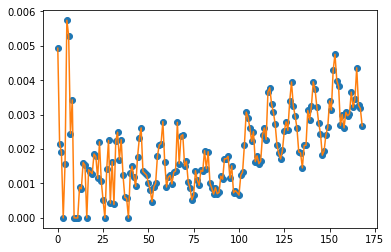

In [22]:
# introduce some floats in our x-values
x = list(range(number_of_month))
y = list(df_intensity['intensity'])


plt.plot(x, y, 'o')
#plt.plot(lowess_x, lowess_y, '*')
plt.plot(x, y, '-')
plt.show()

In [23]:
writer = pd.ExcelWriter('output_reims.xlsx')
df_intensity.to_excel(writer,'Sheet1')
writer.save()